In [2]:
#import all the required libraries

import numpy as np, pandas as pd
import scipy.stats as stat
import sklearn as sk
import pandas_profiling
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
#import the file 
data = pd.read_csv('G:/Analytics Lab/Python/ML/order wise/6/2. Predicting House Prices/House_Prices.csv',index_col='Home')

In [39]:
#checking the shape of dataset
data.shape

(128, 7)

In [40]:
#checking the data types 
data.dtypes

Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [41]:
data.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [55]:
#dividing the dataset into continous and variables

data_cont= data.select_dtypes(include='int64')
data_var=data.select_dtypes(include='object')

In [56]:
data_cont.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,,,,,
1,114300,1790,2,2,2
2,114200,2030,4,2,3
3,114800,1740,3,2,1
4,94700,1980,3,2,3
5,119800,2130,3,3,3


In [57]:
data_var.head()

,Brick,Neighborhood
Home,,
1,No,East
2,No,East
3,No,East
4,No,East
5,No,East


In [58]:
#data auditing for the report 

def var_summary(x): 
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.std()/x.mean(),x.min(),x.max(),
                         x.quantile(0.01),x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),
                         x.quantile(0.90),x.quantile(0.99),x.max()],index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' 
                                                                            ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [59]:
cont_summary=data_cont.apply(var_summary).T
cont_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,0.206006,69100.0,211200.0,81570.0,91310.0,102020.0,111325.0,125950.0,148250.0,166560.0,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,0.105737,1450.0,2590.0,1530.8,1664.0,1720.0,1880.0,2000.0,2140.0,2250.0,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,0.240108,2.0,5.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,0.210399,2.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,0.414768,1.0,6.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,5.00,6.0


In [60]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

In [61]:
cat_summary = data_var.apply(cat_summary)
cat_summary

,Brick,Neighborhood
N,128,128
NMISS,0,0
ColumnsNames,"No 86 Yes 42 Name: Brick, dtype: int64",East 45 North 44 West 39 Name: Neig...


In [62]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [63]:
data_var.columns

Index(['Brick', 'Neighborhood'], dtype='object')

In [64]:
#for c_feature in categorical_features

for c_feature in ['Brick', 'Neighborhood']:
    data_var[c_feature] = data_var[c_feature].astype('category')
    data_var = create_dummies(data_var , c_feature )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [70]:
#join both the tables 

house = pd.concat([data_cont,data_var], axis=1)
house.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

In [71]:
house.shape

(128, 8)

In [72]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
Home,,,,,,,,
1,114300,1790,2,2,2,0,0,0
2,114200,2030,4,2,3,0,0,0
3,114800,1740,3,2,1,0,0,0
4,94700,1980,3,2,3,0,0,0
5,119800,2130,3,3,3,0,0,0


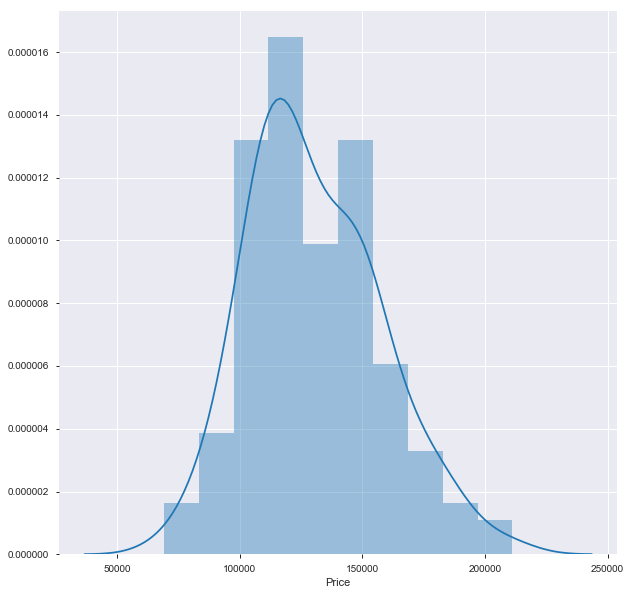

In [77]:
#data exploration 
plt.figure(figsize=(10,10))
sns.distplot(house.Price,)

In [79]:
cor = house.corr()
cor

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
Price,1.000000,0.552982,0.525926,0.523258,-0.313636,0.452817,-0.548221,0.714007
SqFt,0.552982,1.000000,0.483807,0.522745,0.336923,0.079792,-0.288886,0.250759
Bedrooms,0.525926,0.483807,1.000000,0.414556,0.114271,0.046380,-0.364667,0.471477
Bathrooms,0.523258,0.522745,0.414556,1.000000,0.143793,0.171977,-0.275830,0.285923
Offers,-0.313636,0.336923,0.114271,0.143793,1.000000,-0.144986,0.332987,-0.327425
Brick_Yes,0.452817,0.079792,0.046380,0.171977,-0.144986,1.000000,-0.260554,0.115793
Neighborhood_North,-0.548221,-0.288886,-0.364667,-0.275830,0.332987,-0.260554,1.000000,-0.479098
Neighborhood_West,0.714007,0.250759,0.471477,0.285923,-0.327425,0.115793,-0.479098,1.000000


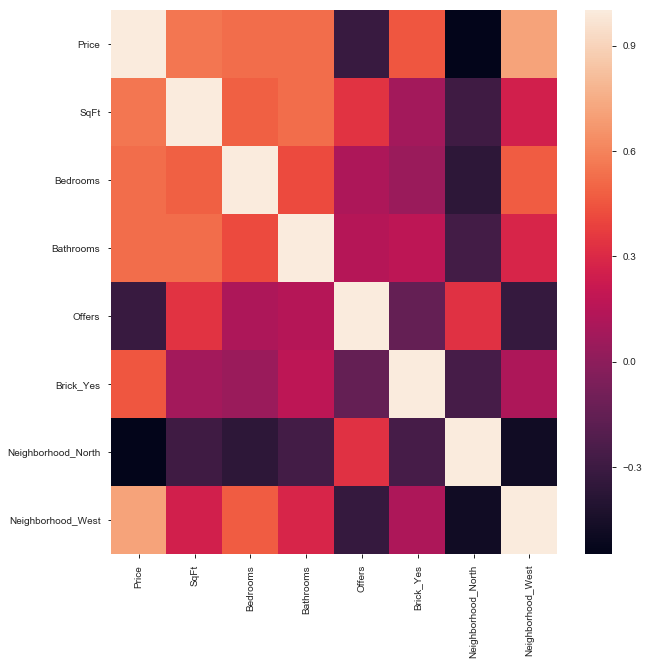

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(cor)

In [85]:
#keeping all the independent variables together
free_house= house.columns.difference(['Price'])
free_house

Index(['Bathrooms', 'Bedrooms', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West', 'Offers', 'SqFt'],
      dtype='object')

In [116]:
#here we are dividing the house set into test and train
train, test = train_test_split( house,test_size = 0.3,random_state = 1234 )

In [ ]:
#then we apply the Ordinary least squares (OLS) regression method on the train and test data

In [92]:
# P value is more than 0.05 hence  we reject the value of Neighborhood_North
lm = smf.ols("Price~Bathrooms+Bedrooms+Brick_Yes+Neighborhood_West+Offers+SqFt", train).fit()
lm

In [93]:
lm.summary(())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ()   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     84.62
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           5.01e-33
Time:                        12:08:29   Log-Likelihood:                -939.68
No. Observations:                  89   AIC:                             1893.
Df Residuals:                      82   BIC:                             1911.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2924.5186      1e+04      0.291      0.772   -1.71e+04    2.29e+04
Bathrooms          6982.4986   2505.228      2.787      0.007    1998.802     1.2e+04
Bedrooms           5188.5656   1959.956      2.647      0.010    1289.589    9087.543
Brick_Yes           1.66e+04   2236.408      7.423      0.000    1.22e+04    2.11e+04
Neighborhood_West   2.05e+04   2997.888      6.837      0.000    1.45e+04    2.65e+04
Offers            -6971.3968   1085.019     -6.425      0.000   -9129.845   -4812.949
SqFt                 50.7657      6.347      7.998      0.000      38.139      63.392
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.401
Skew:                           0.132   Prob(JB):                        0.818
Kurtosis:                       2.805   Cond. No.                     1.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Mathematical equation:

### Thus from the OLS regression result we know 

### Price = 2924.52 + 6982.5 * Bathrooms + 5188.566 * Bedrooms + 1.66e+04*  Brick_Yes + 2.05e+04 * Neighborhood_West -6971.3968 * Offers + 50.77 * SqFt

In [ ]:
#the values are then predicted on the basis of the above equation 
#train.Price,Test.price  is the data before OLS 
#train["pred_price"] ,test["pred_price"]  is the data after OLS 

In [118]:
#predict the price on train data
train["pred_price"] = lm.predict(train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
#predict the price on test data
test["pred_price"] = lm.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Test the accuracy of the model
###    a.  MAPE: Mean Absolute Percentage Error
###    b.  RMSE: Root Mean Square Error
###    c.  Corelation between actual and predicted

In [120]:
#Train Data
MAPE_train = np.mean(np.abs(train.Price - train.pred_price)/train.Price )
print(MAPE_train)

#Test Data
MAPE_test = np.mean(np.abs(test.Price - test.pred_price)/test.Price )
print(MAPE_test)


print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

0.05959266068642184
0.07035723466575873
MAPE of training data:  0.05959266068642184  |  MAPE of testing data:  0.07035723466575873


In [121]:
#Train Data
RMSE_train = mean_squared_error(train.Price , train.pred_price)
print(RMSE_train)


#Test Data
RMSE_test = mean_squared_error(test.Price , test.pred_price)
print(RMSE_test)

print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

86746462.06285825
121154453.22170125
RMSE of training data:  86746462.06285825  |  RMSE of testing data:  121154453.22170125


In [124]:
#Train Data
Corr_train = stat.stats.pearsonr(train.Price , train.pred_price)
print(Corr_train)


#Test Data
Corr_test = stat.stats.pearsonr(test.Price , test.pred_price)
print(Corr_test)

print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)


(0.9278707588380337, 4.913533909090524e-39)
(0.9383363570715478, 1.1858398037093647e-18)
Correlation of training data:  (0.9278707588380337, 4.913533909090524e-39)  |  Correlation of testing data:  (0.9383363570715478, 1.1858398037093647e-18)


In [137]:
df = pd.DataFrame({'Actual': train.Price, 'Predicted': train.pred_price})
df.head()

,Actual,Predicted
Home,,
87,102700,106213.025290
98,126800,138428.534814
90,97800,101420.121304
21,116200,102411.629200
119,150200,127136.021817


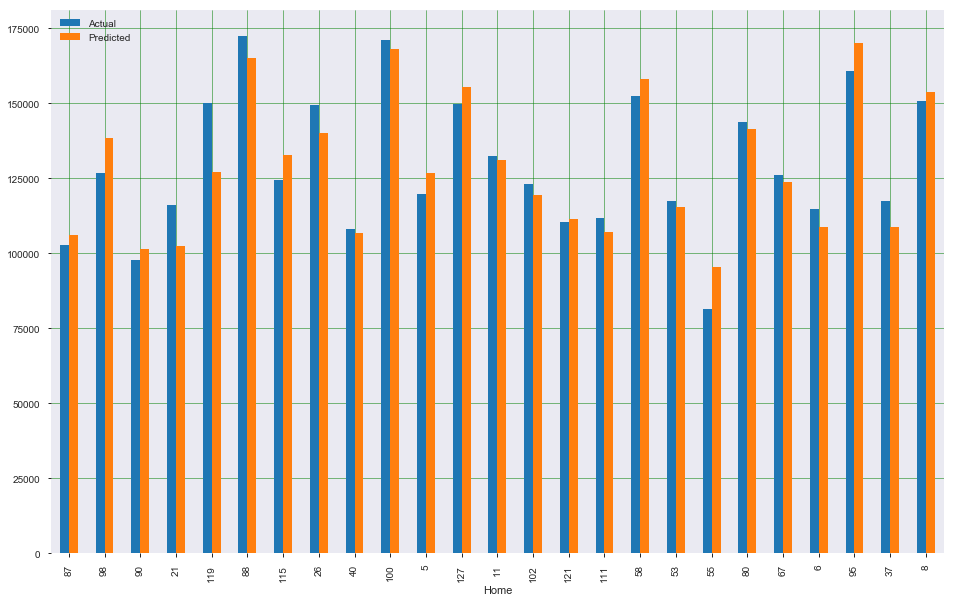

In [138]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()